### BLEU WITH MISTRAL


In [1]:
reference_responses = [
    "Kuimarisha Kinga Ya Mwili",
    "Kudhibiti Shinikizo La Damu",
    "Kuboresha Afya Ya Moyo",
]

generated_responses = [
    "Parachichi lina kiwango cha juu cha potasiamu, ambayo husaidia kudhibiti shinikizo la damu. Shinikizo la damu lisilodhibitiwalinaweza kusababisha matatizo wakati wa ujauzito.",
    "Mama mjamzito kula parachichi kwa kiasi ni bora zaidi, kwani lina kalori nyingi. Kama unakabiliwa na matatizo yoyote ya kiafya au unahitaji maelekezo maalum kuhusu lishe yako wakati wa ujauzito, ni bora kushauriana na daktari wako au mtaalamu wa lishe.",
    "Kutumia parachichi kwa upepo ni ya kutumia kwa kiasi, lakini hakuna faida kubwa kwa mama mjamzito kwa kutumia parachichi hili kwa kiasi. Kama unakabiliwa na matatizo yoyote ya kiafya au unahitaji maelekezo maalum kuhusu lishe yako wakati wa ujauzito, ni bora kushauriana na daktari wako au mtaalamu wa lishe."
]

In [2]:
# !pip install nltk

In [3]:
# Tokenize both (split by space for simplicity)
reference_tokenized = [[ref.split()] for ref in reference_responses]
generated_tokenized = [gen.split() for gen in generated_responses]

In [4]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
# BLEU scoring with smoothing (for short sentences)
smoothing = SmoothingFunction().method4
bleu = corpus_bleu(reference_tokenized[:len(generated_tokenized)], generated_tokenized, smoothing_function=smoothing)

print(f"BLEU Score: {bleu:.4f}")

BLEU Score: 0.0000


BLEU is harsh for open-ended generation


### Using GPT-4.1 Nano


In [5]:
generated_responses_gpt = [
    'kuimarisha kinga ya mwili',
    'kudhibiti shinikizo la damu',
    'kuboresha afya ya moyo ya mama mjamzito'
]

In [6]:
# Preprocessing: tokenize and lowercase
references = [[ref.lower().split()] for ref in reference_responses]
hypotheses = [gen.lower().split() for gen in generated_responses_gpt]

# Compute BLEU score
smoothie = SmoothingFunction().method4
bleu_score = corpus_bleu(references, hypotheses, smoothing_function=smoothie)

print(f"Corpus BLEU score: {bleu_score:.4f}")

Corpus BLEU score: 0.6687


In [7]:
### Using llama 2 UlizaLlama
generated_responses_llama = [
    "1) Kuimarisha Kinga Ya Mwili. Vitamini C na E kwenye parachichi husaidia kuimarisha kinga ya mwili, ambayo ni muhimu kwa mjamzito ili kuzuia magonjwa.",
    "2) Kudhbiti Shinikizo La Damu. Parachichi lina kiwango cha juu cha potasiamu, ambayo husaidia kudhibiti shinikizo la damu.Shinikizo la damu lisilodhibitiwalinaweza kusababisha matatizo wakati wa ujauzito.",
    "3) Kuboresha Afya Ya Moyo."
    ]

In [8]:
# Preprocessing: tokenize and lowercase
references = [[ref.lower().split()] for ref in reference_responses]
hypotheses = [gen.lower().split() for gen in generated_responses_llama]

# Compute BLEU score
smoothie = SmoothingFunction().method4
bleu_score = corpus_bleu(references, hypotheses, smoothing_function=smoothie)

print(f"Corpus BLEU score: {bleu_score:.4f}")

Corpus BLEU score: 0.0601


## Deepseek


In [9]:
generated_responses_deepseek = [
    "1. **Kuimarisha Kinga Ya Mwili:** Parachichi lina vitamini C na E, ambavyo husaidia kuongeza nguvu ya kinga ya mwili, hivyo kuwa muhimu kwa mjamzito kuzuia magonjwa.",
    "2. **Kudhibiti Shinikizo La Damu:** Kiwango cha juu cha potasiamu katika parachichi husaidia kudhibiti shinikizo la damu, ambalo linaweza kuwa na matatizo wakati wa ujauzito.",
    "3. **Kuboresha Afya Ya Moyo:** Parachichi pia husaidia kuboresha afya ya moyo, jambo ambalo ni muhimu kwa mjamzito."
]

In [10]:
# Preprocessing: tokenize and lowercase
references = [[ref.lower().split()] for ref in reference_responses]
hypotheses = [gen.lower().split() for gen in generated_responses_deepseek]

# Compute BLEU score
smoothie = SmoothingFunction().method4
bleu_score = corpus_bleu(references, hypotheses, smoothing_function=smoothie)

print(f"Corpus BLEU score: {bleu_score:.4f}")

Corpus BLEU score: 0.0375


In [12]:
import pandas as pd

df = pd.read_excel('scores.xlsx')

In [13]:
df.head()

,Model,METEOR SCORE,BLEU SCORE
0,Mistral,0.0196,0.0000
1,Deepseek,0.4435,0.0375
2,GPT-4,0.9061,0.6687
3,Llama2,0.6046,0.0601


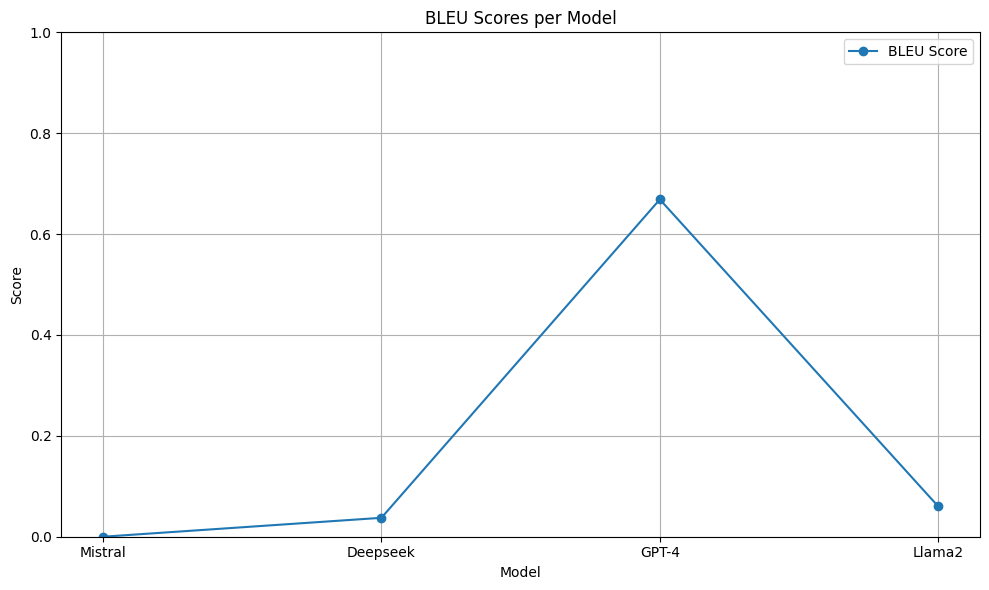

In [14]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot BLEU and METEOR
plt.plot(df["Model"], df["BLEU SCORE"], marker='o', label='BLEU Score')

# Add titles and labels
plt.title("BLEU Scores per Model")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)  # scores range from 0 to 1
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()